In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [8]:
# Sentiment Analysis using LSTM
f = pd.read_csv('Sentiment.csv')

In [9]:
# Keeping only the neccessary columns
data = f[['text','sentiment']]

# Dropping all the rows with null values
data = data.dropna()

# Keeping only the rows with positive and negative sentiments
data = data[data.sentiment != "Neutral"]

# Replacing the positive and negative sentiments with 1 and 0 respectively
data['sentiment'] = data['sentiment'].replace('Positive',1)
data['sentiment'] = data['sentiment'].replace('Negative',0)


In [10]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

In [11]:
# Tokenizing the data
tokenizer = Tokenizer(num_words = 5000, split = " ")
tokenizer.fit_on_texts(train['text'].values)
    

In [12]:
# Converting the text to sequences
X_train = tokenizer.texts_to_sequences(train['text'].values)
X_test = tokenizer.texts_to_sequences(test['text'].values)
    

In [13]:
# Padding the sequences
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)


In [25]:
# Creating the model
model = Sequential()
model.add(Embedding(5000, 256, input_length = X_train.shape[1]))
model.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())
    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 256)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,805,569
Trainable params: 1,805,569
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Training the model
batch_size = 32
model.fit(X_train, train['sentiment'], epochs = 10, batch_size = batch_size, verbose = 2)
    

Epoch 1/10
269/269 - 60s - loss: 0.4102 - accuracy: 0.8271 - 60s/epoch - 222ms/step
Epoch 2/10
269/269 - 46s - loss: 0.2685 - accuracy: 0.8906 - 46s/epoch - 170ms/step
Epoch 3/10
269/269 - 45s - loss: 0.2062 - accuracy: 0.9194 - 45s/epoch - 169ms/step
Epoch 4/10
269/269 - 49s - loss: 0.1559 - accuracy: 0.9362 - 49s/epoch - 182ms/step
Epoch 5/10
269/269 - 55s - loss: 0.1238 - accuracy: 0.9527 - 55s/epoch - 203ms/step
Epoch 6/10
269/269 - 55s - loss: 0.1066 - accuracy: 0.9591 - 55s/epoch - 204ms/step
Epoch 7/10
269/269 - 50s - loss: 0.0919 - accuracy: 0.9618 - 50s/epoch - 187ms/step
Epoch 8/10
269/269 - 54s - loss: 0.0916 - accuracy: 0.9631 - 54s/epoch - 200ms/step
Epoch 9/10
269/269 - 54s - loss: 0.0788 - accuracy: 0.9669 - 54s/epoch - 202ms/step
Epoch 10/10
269/269 - 61s - loss: 0.0817 - accuracy: 0.9676 - 61s/epoch - 228ms/step


KeyError: 'val_accuracy'

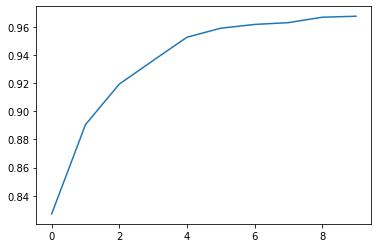

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plotting the accuracy and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()



    

In [ ]:
# Plotting the loss and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()